In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing libraries
import pandas as pd
import os
import pickle
import random

from matplotlib import pyplot as plt

from src.models import parameter_learning as lfi
from src.models import build_model as build
from src.models import model_schemata as schema
from src.models import inference as inf
from src.visualization import visualize as viz

In [3]:
os.chdir('/Users/magdalena/OneDrive - Queen Mary, University of London/bezzlab/research/projects/phospho_pi/')
# os.chdir('/home/mhuebner/Desktop/bezzlab/research/projects/phospho_pi/')

In [4]:
experiments = ['exp1_200i', 'exp2_200i', 'exp3_200i', 'exp4_200i', 'exp5_200i', 'exp6_200i', 'exp7_200i', 'exp8_200i', 'exp10_200i', 'exp11_200i']

In [5]:
data = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/p_model/testing_relepev_{exp}.pkl', 'rb') as f:
        data[exp] = pickle.load(f)

#### Evaluation of learned parameters (relepev)

Average JSD per experiment pair

In [8]:
predicates = ['p_occupancy']

jsd_dict = {}

# Iterate over predicates
for pred in predicates:
    jsd_dict[pred] = lfi.compare_jsds(pred, experiments, data)

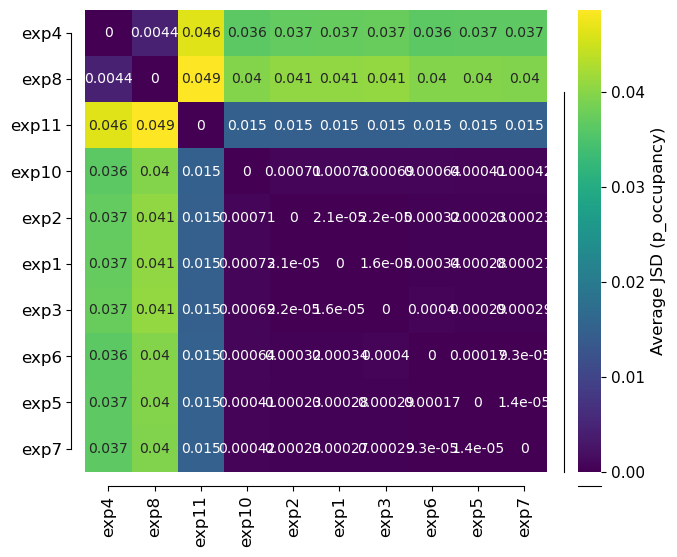

In [7]:
individual_predicate_jsd_occupancy = viz.calc_individual_predicate_jsd_heatmap(experiments, 'p_occupancy', jsd_dict)
viz.plot_clustered_heatmap(individual_predicate_jsd_occupancy, score_type='Average JSD (p_occupancy)')

Average fraction of MaxMatch per experiment pair

In [8]:
predicates = ['p_occupancy']

max_dict = {}

# Iterate over predicates
for pred in predicates:
    max_dict[pred] = lfi.compare_max_categories(pred, experiments, data)

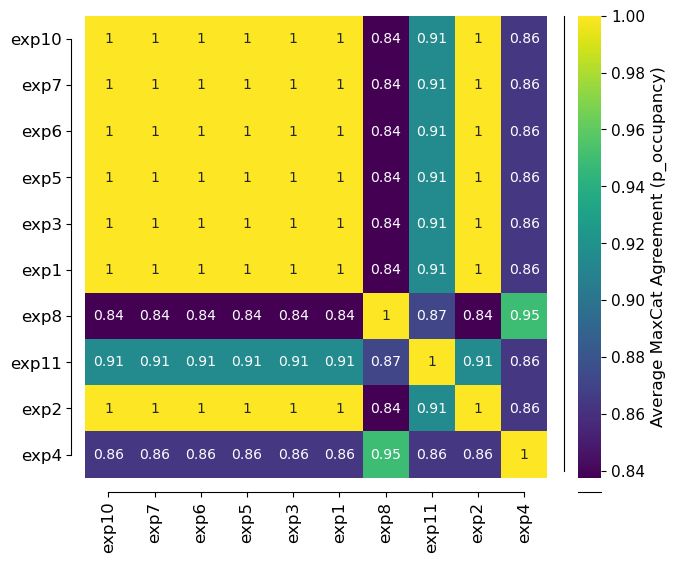

In [9]:
individual_predicate_overlap_occupancy = viz.calc_individual_predicate_overlap_heatmap(experiments, 'p_occupancy', max_dict)
viz.plot_clustered_heatmap(individual_predicate_overlap_occupancy, score_type='Average MaxCat Agreement (p_occupancy)')

#### Compare AUC (all experiments)

In [6]:
experiments = ['exp1_200i', 'exp2_200i', 'exp3_200i', 'exp4_200i', 'exp5_200i', 'exp6_200i', 'exp7_200i', 'exp8_200i', 'exp9_200i', 'exp10_200i', 'exp11_200i', 'exp12_40i']

In [7]:
data_relepev = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/p_model/testing_relepev_{exp}.pkl', 'rb') as f:
        data_relepev[exp] = pickle.load(f)

In [8]:
p_fc = pd.read_csv('data/processed/ebdt_data/sub_network_p/p_fc.csv')
p_fc_scaled = pd.read_csv('data/processed/ebdt_data/sub_network_p/p_fc_scaled.csv')

In [9]:
p_fc['p_base'] = 1 - p_fc['p_dec'] - p_fc['p_inc']
p_fc.loc[p_fc['p_base'] < 0, 'p_base'] = 0


In [10]:
p_fc_scaled['p_base'] = 1 - p_fc_scaled['p_dec'] - p_fc_scaled['p_inc']
p_fc_scaled.loc[p_fc_scaled['p_base'] < 0, 'p_base'] = 0

In [11]:
# getting sample names (union of all samples in all datasets)
samples = list(set(p_fc['sample']))
samples.sort()
# sample x% of samples randomly without replacement with seed
random.seed(612)
train = random.sample(samples, int(len(samples)*0.8))
test = [x for x in samples if x not in train]
# filter data
p_fc = p_fc[p_fc['sample'].isin(test)]
p_fc_scaled = p_fc_scaled[p_fc_scaled['sample'].isin(test)]

In [12]:
analysis_dicts_0 = inf.prep_experiments_for_auc(data_relepev, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0)
analysis_dicts_scaled_0 = inf.prep_experiments_for_auc(data_relepev, p_fc_scaled, result_type='p_occupancy', y_true_type='p_fc', threshold=0)
analysis_dicts_80 = inf.prep_experiments_for_auc(data_relepev, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)
analysis_dicts_scaled_80 = inf.prep_experiments_for_auc(data_relepev, p_fc_scaled, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)

In [13]:
y_onehot_test_list_0 = []
y_score_list_0 = []
experiment_names = []
for exp in analysis_dicts_0.keys():
    if exp in ['exp11_200i', 'exp12_40i']:
        y_onehot_test_list_0.append(analysis_dicts_scaled_0[exp]['y_onehot_test'])
        y_score_list_0.append(analysis_dicts_scaled_0[exp]['y_score'])
        experiment_names.append(exp)
    else:
        y_onehot_test_list_0.append(analysis_dicts_0[exp]['y_onehot_test'])
        y_score_list_0.append(analysis_dicts_0[exp]['y_score'])
        experiment_names.append(exp)

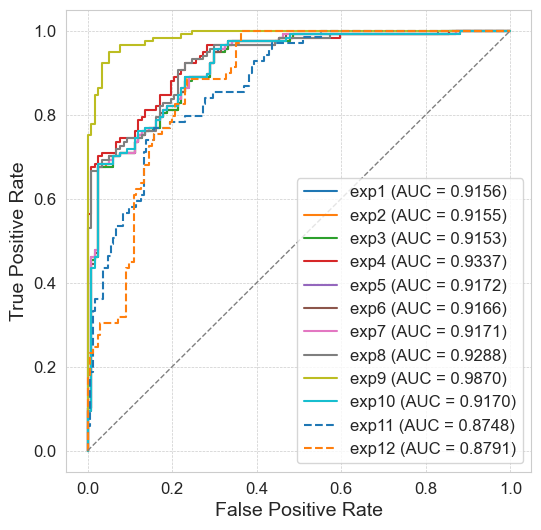

In [18]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_0, y_score_list_0, experiment_names)

In [19]:
y_onehot_test_list_80 = []
y_score_list_80 = []
experiment_names = []
for exp in analysis_dicts_80.keys():
    if exp in ['exp11_200i', 'exp12_40i']:
        y_onehot_test_list_80.append(analysis_dicts_scaled_80[exp]['y_onehot_test'])
        y_score_list_80.append(analysis_dicts_scaled_80[exp]['y_score'])
        experiment_names.append(exp)
    else:
        y_onehot_test_list_80.append(analysis_dicts_80[exp]['y_onehot_test'])
        y_score_list_80.append(analysis_dicts_80[exp]['y_score'])
        experiment_names.append(exp)

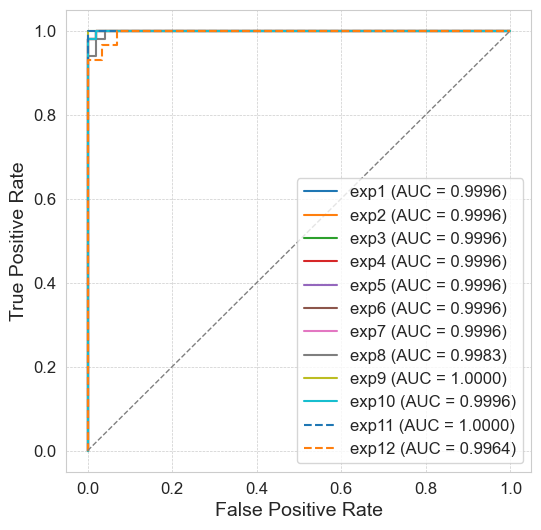

In [20]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_80, y_score_list_80, experiment_names)

#### Evaluation of learned parameters (releev)

In [25]:
data_releev = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/p_model/testing_releev_{exp}.pkl', 'rb') as f:
        data_releev[exp] = pickle.load(f)

In [16]:
analysis_dicts_0_releev = inf.prep_experiments_for_auc(data_releev, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0)
analysis_dicts_scaled_0_releev = inf.prep_experiments_for_auc(data_releev, p_fc_scaled, result_type='p_occupancy', y_true_type='p_fc', threshold=0)

In [18]:
y_onehot_test_list_releev = []
y_score_list_releev = []
experiment_names = []
for exp in analysis_dicts_0_releev.keys():
    if exp in ['exp11_200i', 'exp12_40i']:
        y_onehot_test_list_releev.append(analysis_dicts_scaled_0_releev[exp]['y_onehot_test'])
        y_score_list_releev.append(analysis_dicts_scaled_0_releev[exp]['y_score'])
        experiment_names.append(exp)
    else:
        y_onehot_test_list_releev.append(analysis_dicts_0_releev[exp]['y_onehot_test'])
        y_score_list_releev.append(analysis_dicts_0_releev[exp]['y_score'])
        experiment_names.append(exp)

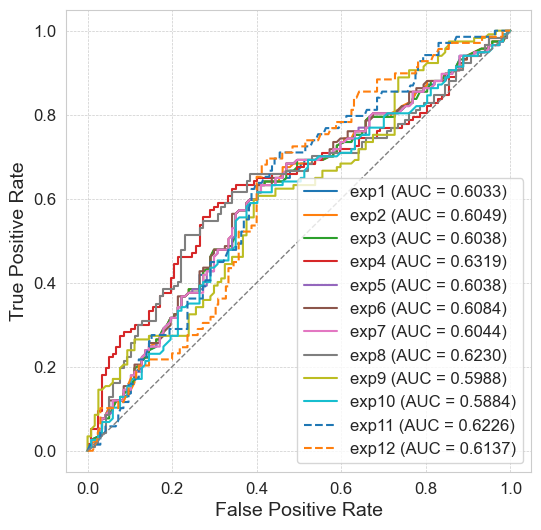

In [19]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_releev, y_score_list_releev, experiment_names)

In [20]:
analysis_dicts_80_releev = inf.prep_experiments_for_auc(data_releev, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)
analysis_dicts_scaled_80_releev = inf.prep_experiments_for_auc(data_releev, p_fc_scaled, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)

In [21]:
y_onehot_test_list_80_releev = []
y_score_list_80_releev = []
experiment_names = []
for exp in analysis_dicts_80_releev.keys():
    if exp in ['exp11_200i', 'exp12_40i']:
        y_onehot_test_list_80_releev.append(analysis_dicts_scaled_80_releev[exp]['y_onehot_test'])
        y_score_list_80_releev.append(analysis_dicts_scaled_80_releev[exp]['y_score'])
        experiment_names.append(exp)
    else:
        y_onehot_test_list_80_releev.append(analysis_dicts_80_releev[exp]['y_onehot_test'])
        y_score_list_80_releev.append(analysis_dicts_80_releev[exp]['y_score'])
        experiment_names.append(exp)

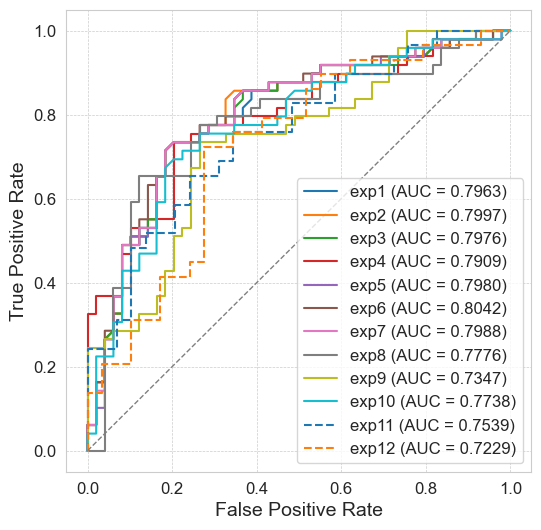

In [22]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_80_releev, y_score_list_80_releev, experiment_names)

Have another plot comparing releev to relepev for all experiments

In [26]:
data_releev['exp12_40i']['p_occupancy'].drop(columns=['base'], inplace=True)
data_releev['exp9_200i']['p_occupancy'].drop(columns=['base'], inplace=True)

In [27]:
analysis_dicts_0_comp = {}
analysis_dicts_80_comp = {}
for exp in experiments:
    data_relepev[exp]['p_occupancy']['value'] = data_relepev[exp]['p_occupancy'][['p_dec', 'p_inc', 'p_base']].idxmax(axis=1)
    data_relepev[exp]['p_occupancy']['prob'] = data_relepev[exp]['p_occupancy'][['p_dec', 'p_inc', 'p_base']].max(axis=1)
    data_relepev[exp]['p_occupancy']['value'] = data_relepev[exp]['p_occupancy']['value'].str.replace('p_', '')
    analysis_dicts_0_comp[exp] = inf.prep_experiments_for_auc(data_releev, data_relepev[exp]['p_occupancy'], result_type='p_occupancy', y_true_type='p_fc', threshold=0)
    analysis_dicts_80_comp[exp] = inf.prep_experiments_for_auc(data_releev, data_relepev[exp]['p_occupancy'], result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)

In [28]:
y_onehot_test_list_0_comp = []
y_score_list_0_comp = []
experiment_names = []
for exp in analysis_dicts_0_comp.keys():
    y_onehot_test_list_0_comp.append(analysis_dicts_0_comp[exp][exp]['y_onehot_test'])
    y_score_list_0_comp.append(analysis_dicts_0_comp[exp][exp]['y_score'])
    experiment_names.append(exp)

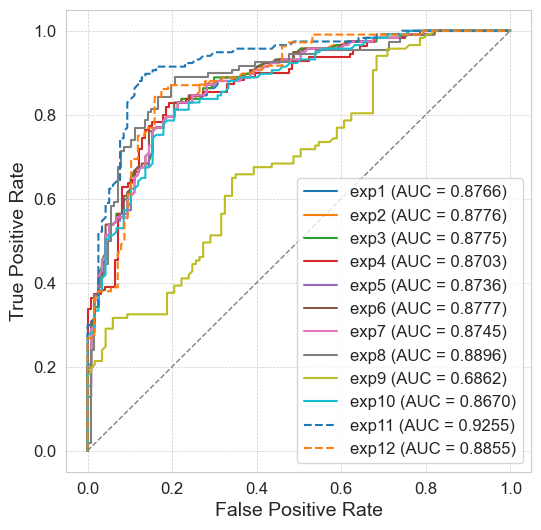

In [29]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_0_comp, y_score_list_0_comp, experiment_names)

In [30]:
y_onehot_test_list_80_comp = []
y_score_list_80_comp = []
experiment_names = []
for exp in analysis_dicts_0_comp.keys():
    y_onehot_test_list_80_comp.append(analysis_dicts_80_comp[exp][exp]['y_onehot_test'])
    y_score_list_80_comp.append(analysis_dicts_80_comp[exp][exp]['y_score'])
    experiment_names.append(exp)

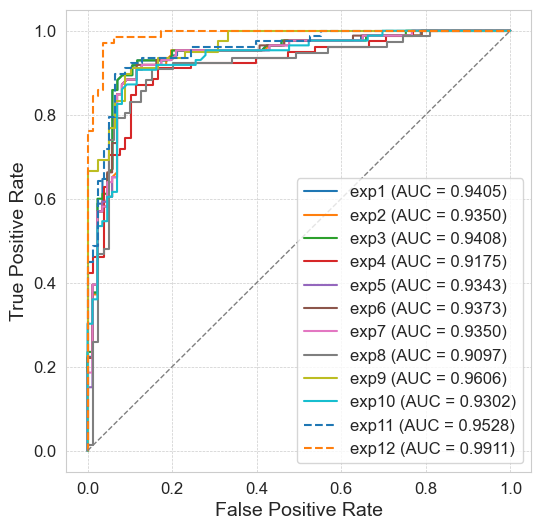

In [31]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_80_comp, y_score_list_80_comp, experiment_names)

Influence of N iterations

In [85]:
experiments = ['exp6_5i', 'exp6_10i', 'exp6_40i', 'exp6_200i']

In [86]:
data2 = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/p_model/testing_relepev_{exp}.pkl', 'rb') as f:
        data2[exp] = pickle.load(f)

In [87]:
analysis_dicts_exp6_0 = inf.prep_experiments_for_auc(data2, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0)
analysis_dicts_exp6_80 = inf.prep_experiments_for_auc(data2, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)

In [88]:
y_onehot_test_list = []
y_score_list = []
experiment_names = []
for exp in analysis_dicts_exp6_0.keys():
    y_onehot_test_list.append(analysis_dicts_exp6_0[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_exp6_0[exp]['y_score'])
    experiment_names.append(exp)

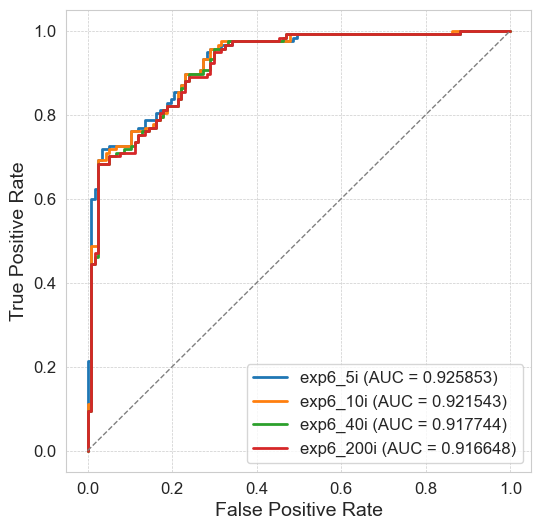

In [89]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list, y_score_list, experiment_names)

In [90]:
y_onehot_test_list = []
y_score_list = []
experiment_names = []
for exp in analysis_dicts_exp6_80.keys():
    y_onehot_test_list.append(analysis_dicts_exp6_80[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_exp6_80[exp]['y_score'])
    experiment_names.append(exp)

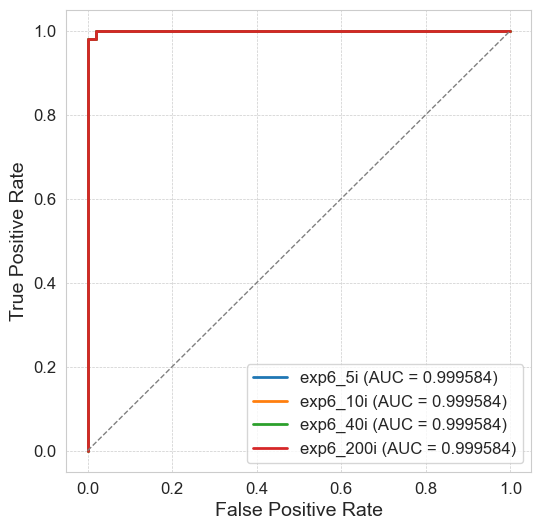

In [91]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list, y_score_list, experiment_names)

In [92]:
data2 = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/p_model/testing_releev_{exp}.pkl', 'rb') as f:
        data2[exp] = pickle.load(f)

In [93]:
analysis_dicts_exp6_0 = inf.prep_experiments_for_auc(data2, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0)
analysis_dicts_exp6_80 = inf.prep_experiments_for_auc(data2, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)

In [94]:
y_onehot_test_list = []
y_score_list = []
experiment_names = []
for exp in analysis_dicts_exp6_0.keys():
    y_onehot_test_list.append(analysis_dicts_exp6_0[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_exp6_0[exp]['y_score'])
    experiment_names.append(exp)

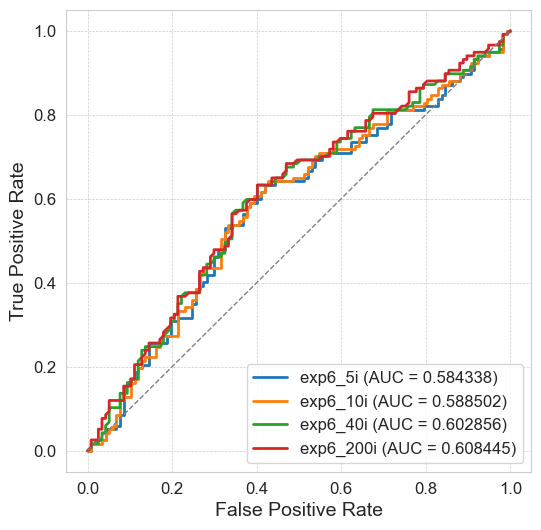

In [95]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list, y_score_list, experiment_names)

In [96]:
y_onehot_test_list = []
y_score_list = []
experiment_names = []
for exp in analysis_dicts_exp6_80.keys():
    y_onehot_test_list.append(analysis_dicts_exp6_80[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_exp6_80[exp]['y_score'])
    experiment_names.append(exp)

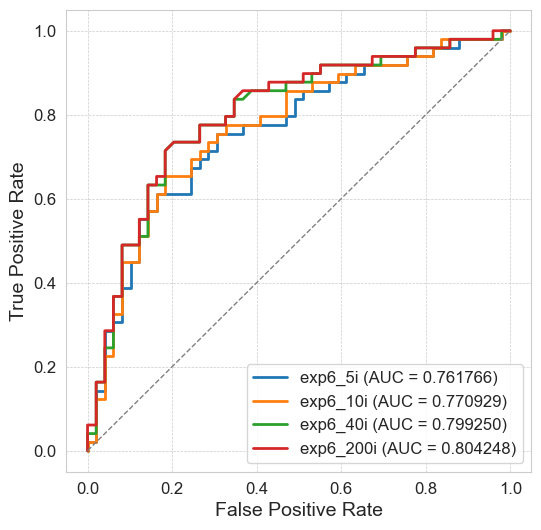

In [97]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list, y_score_list, experiment_names)

In [14]:
# Extracting data from your analysis dictionary
x11 = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['prob']
y11 = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['JSD']
mask_no_match11 = analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe']['MaxMatch'] == 0

In [15]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x11, y=y11, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x11[mask_no_match11], y11[mask_no_match11], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from sid-score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

NameError: name 'sns' is not defined

In [16]:
analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe'][mask_no_match11][analysis_dicts_scaled_0['exp11_200i']['analysis_dataframe'][mask_no_match11]['sample'] == 'Dasatinib']

,phosphosite,sample,value,prob,p_dec_p_fc,p_inc_p_fc,p_base_p_fc,p_dec_p_occupancy,p_inc_p_occupancy,p_base_p_occupancy,JSD,max_category_p_fc,max_category_p_occupancy,MaxMatch
0,RBM39(Y95),Dasatinib,inc,0.063741,0.001000,0.063741,0.935259,0.997634,0.001731,0.000635,0.984727,p_base,p_dec,0
1,HIPK2(Y361),Dasatinib,inc,0.028595,0.001000,0.028595,0.970405,0.897334,0.091844,0.010822,0.903808,p_base,p_dec,0
8,PTTG1IP(Y174),Dasatinib,inc,0.097947,0.001000,0.097947,0.901053,0.880600,0.063229,0.056171,0.762315,p_base,p_dec,0
17,ANXA2P2(Y24),Dasatinib,inc,0.544999,0.001000,0.544999,0.454001,0.802486,0.146436,0.051077,0.617595,p_inc,p_dec,0
18,PXN(Y118),Dasatinib,dec,0.164952,0.164952,0.001000,0.834048,0.426443,0.526077,0.047480,0.608875,p_base,p_inc,0
46,ATF1(S198),Dasatinib,inc,0.265878,0.001000,0.265878,0.733122,0.110070,0.777575,0.112355,0.329713,p_base,p_inc,0
